In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/My Drive/major"

/content/drive/My Drive/major


In [3]:
!pip install numpy pandas scipy scikit-learn nose matplotlib pillow h5py scikit-image soundfile librosa tensorflow keras==2.1.0

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 3.7 GB  | Proc size: 899.8 MB
GPU RAM Free: 10012MB | Used: 5067MB | Util  34% | Total 15079MB


In [0]:
import numpy as np

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,InputLayer,Reshape
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score

import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as sig
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy
import imageio
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from skimage.transform import resize

In [0]:
sr=22050#new sample rate
slice_len=3#seconds

In [0]:
metadata=pd.read_csv('birdsong_metadata.csv')
datafile="songs/xc135521.flac"

label=np.load("all_signal_label.npy")

le=LabelEncoder()
label=le.fit_transform(label)

data, samplerate=sf.read(datafile)

for j in range(len(metadata)):
  if datafile=='songs/xc'+str(metadata['file_id'][j])+'.flac':
    y=metadata['species'][j]
data_resampled=librosa.core.resample(data,samplerate,sr)

In [49]:
y

'aluco'

In [0]:
# divide into 3s segments and find the spectrogram, or mfcc or mfcc_delta
segs=[]
specs=[]
mfccs=[]
for i in range(0,len(data_resampled),sr*3):
  segs.append(data_resampled[i:i+sr*3])
  freq, time, Sxx = sig.spectrogram(data_resampled[i:i+sr*3], sr,mode='magnitude')
  specs.append((Sxx-Sxx.min())/(Sxx.max()-Sxx.min()))
  mfccc = librosa.feature.mfcc(data_resampled[i:i+sr*3], sr,n_mfcc=32)
  mfccc= resize(mfccc,(32,128))
  mfccs.append(mfccc.reshape(32,128,1))

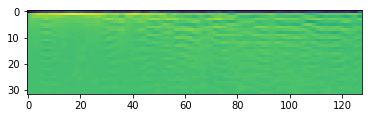

In [86]:
plt.imshow(mfccs[0].reshape(32,128))

In [0]:
# model load and predict

from keras.models import load_model

model=load_model('implementation1.h5') # load different implementations to test

In [80]:
from collections import Counter

sc=StandardScaler()
preds=[]
for i in specs:
  if i.shape==(129,295):
    y_prob=model.predict(sc.fit_transform(i).reshape(1,129,295))
    y_class=y_prob.argmax(axis=-1)
    #print(y_prob[0][2])#0.33789673
    preds.append(le.inverse_transform(y_class)[0])
    #print(y,y_class)
print(Counter(preds).most_common(1)[0][0],y)

communis communis
